### Submitted by:  SANTOSHI PATNAIK, (DS-2306)

# Project. 5: Temperature Forecast Project using ML

# Project Description:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
  


### Problem Statement:
   we have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [ ]:
import pandas as pd                              # importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
df_temp=pd.read_csv('temperature.csv')
df_temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


### Observations:
1. Here the data set contains 7752 number of rows and total of 25 columns
2. out of 25 columns "Next_Tmax" and "Next_Tmin" are the target variables and remaining are the input features

In [84]:
df_temp.Present_Tmax.max()

37.6

In [85]:
df_temp.loc[df_temp.Present_Tmax==df_temp.Present_Tmax.max()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5717,18.0,11-08-2016,37.6,26.8,44.254253,87.745514,34.794021,27.150764,6.366598,111.225118,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.23130,5082.563477,37.0,27.8
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.17823,5992.895996,38.9,29.8


In [86]:
df_temp.Present_Tmax.min()

20.0

In [87]:
df_temp.loc[df_temp.Present_Tmax==df_temp.Present_Tmax.min()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7725,1.0,30-08-2017,20.0,15.1,35.652172,89.973190,24.323737,16.128899,7.087329,108.981108,...,0.0,0.0,0.0,37.6046,126.991,212.335,2.785000,4614.761230,23.8,15.1
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.0,0.0,0.0,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3


##### Observations:
1. The highest value of present_Tmax recorder is 37.6 in the overall years in station.18 on 8-11-2016
2. The lowest value of present_tmax recorded in the overall period is 20.0 in station.1 on 30-8-2017

In [88]:
df_temp.Present_Tmin.min()

11.3

In [89]:
df_temp.loc[df_temp.Present_Tmin==df_temp.Present_Tmin.min()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
6116,17.0,27-08-2016,27.1,11.3,62.793823,91.726936,23.529546,17.963487,7.984566,84.481450,...,0.0,0.405181,1.015573,37.6181,127.099,53.4712,0.697000,4539.616699,24.6,17.1
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.0,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [90]:
df_temp.Present_Tmin.max()

29.9

In [91]:
df_temp.loc[df_temp.Present_Tmin==df_temp.Present_Tmin.max()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
2397,23.0,02-08-2014,35.3,29.9,53.946949,85.985161,30.912804,25.439537,13.011129,117.837212,...,0.005681,0.248885,0.003176,37.5372,126.891,15.5876,0.15540,5360.226563,31.3,24.8
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.17823,5992.895996,38.9,29.8


###### Observations:
1. The highest value recorder for Present_Tmin in the dataset is 29.9 on 08-02-2014 in station no.23
2. The lowest value recorded for Present_Tmin in the dataset is 11.3 on 27-08-2016 in station no.17

# EDA

In [92]:
df_temp.shape

(7752, 25)

In [93]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [94]:
df_temp['Date']=pd.to_datetime(df_temp['Date'])             # conerting from object datatype to date datatype

In [95]:
df_temp['Date'].dtype

dtype('<M8[ns]')

from the info of the dataset we can see almost all the columns in the dataset contains data of "float" data type only except "date" column.. and the data set contains some null values also.. lets check for the null value counts in the dataset

In [96]:
df_temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

-> From above null value counts we can check maximum of 75 null values present in a pericular column.. and the total number of rows we have in the dataset is "7725".             ##(75/7725)*100%##
so the Null values present in the data set contributes only 0.970 percent i.e(less than 1%) which is very small compared to the whole data set.. so we can drop the null values

<AxesSubplot:>

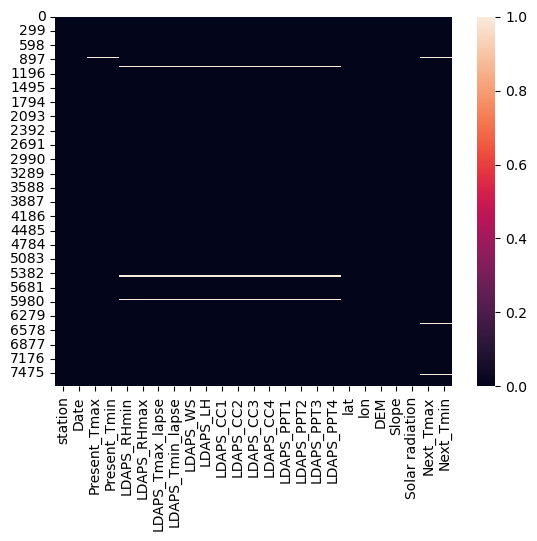

In [97]:
# checking for null values usinh heatmap
sns.heatmap(df_temp.isnull())

from heatmap also we can confirm that there are no null values present in the dataset.

In [98]:
#   Dropping the null Values:
df_temp.dropna(inplace=True)

In [99]:
df_temp.shape             

(7588, 25)

-> Now the data set contains 7588 rows and 25 columns

<AxesSubplot:>

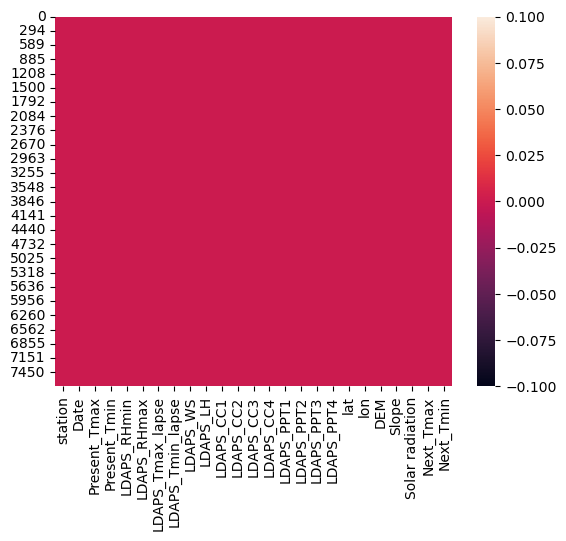

In [100]:
# visualizing null values through heatmap after dropping the null values
sns.heatmap(df_temp.isnull())

-> Now we can see there are no null values present in the data set

# Description of Dataset

In [101]:
df_temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


### Observation:
1. Count of all the columns are same which indicates null missing values present 
2. There is a gap between the 75% and the max value which shows some outliers present
3. Most of the columns data is normally distributed. ans in some columns dat is -vely skewed.. and some columns contains +vely skewed data

## Data Visualization:


### Uivariate Analysys:

In [102]:
df_temp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

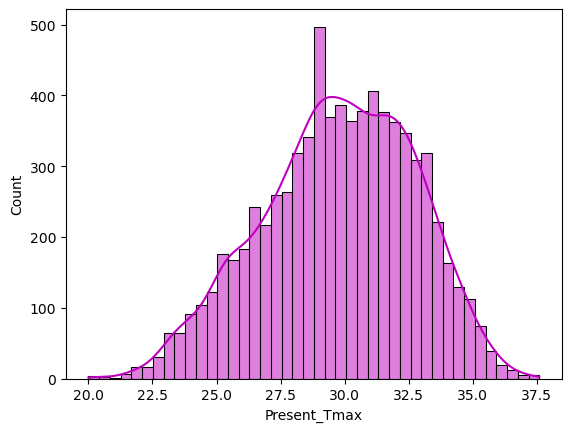

In [103]:
sns.histplot(df_temp['Present_Tmax'],kde=True,color='m')

#### Observations:
1. most of the days the present maximum temperature is recorded between 27.5 to 32.5
2. and the highest Present Tamx value recorded in the dataset (37.6) is very rarely occured

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

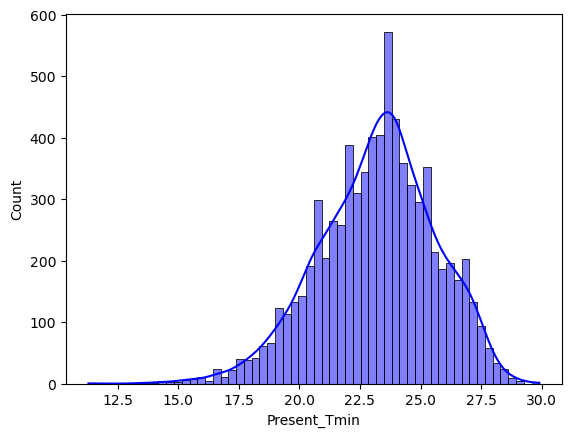

In [104]:
sns.histplot(df_temp['Present_Tmin'],kde=True,color='b')

##### Observations:
1. in most of the days the present Tmin lies in between the range of 22.5 to 27.5.
2. The least present_Tmin recorded in the dataset is 11.3 which is also occured in a rare case.. almost count nearly equal to zero scenario for 11.3 minimum temperature

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

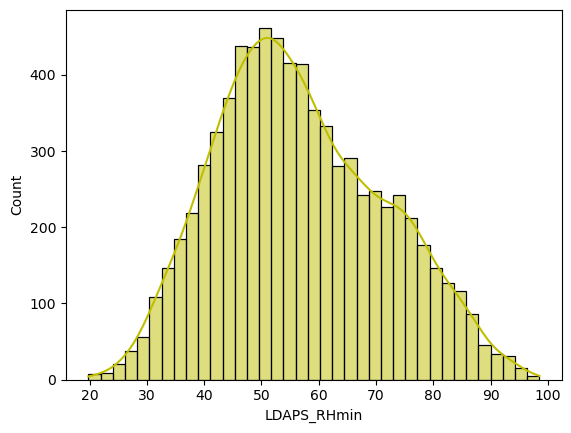

In [105]:
sns.histplot(df_temp['LDAPS_RHmin'],kde=True,color='y')

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

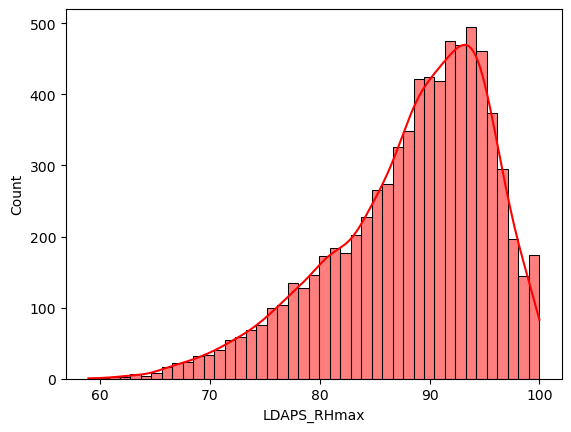

In [106]:
sns.histplot(df_temp['LDAPS_RHmax'],kde=True,color='r')

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

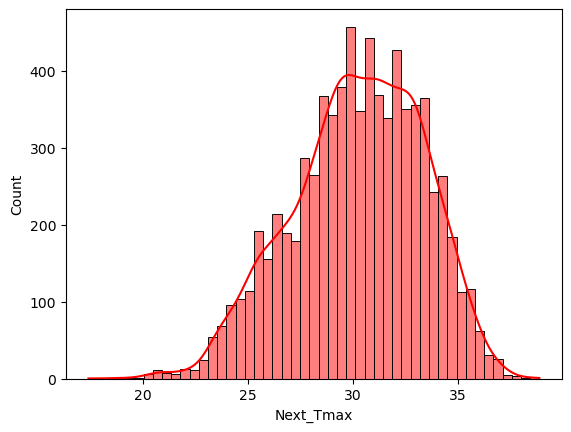

In [107]:
sns.histplot(df_temp['Next_Tmax'],kde=True,color='r')

##### Observations:
1. in maximum cases the Next_Tmax recorded is in between the range of 26 to 35

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

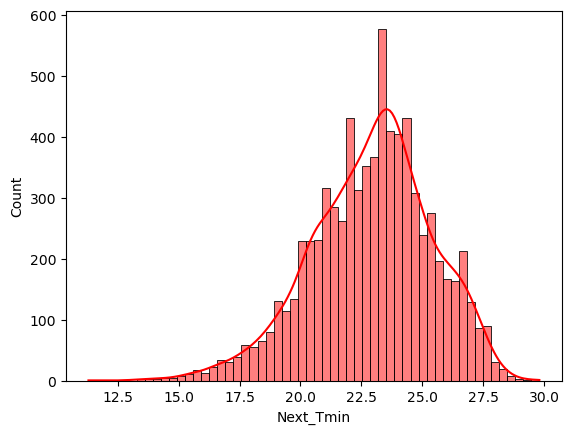

In [108]:
sns.histplot(df_temp['Next_Tmin'],kde=True,color='r')

-->> in most of the Days the Next_Tmin predicted is recorded in the range of 20 to 27.5

## Bivariate Analysis:


In [109]:
df_temp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

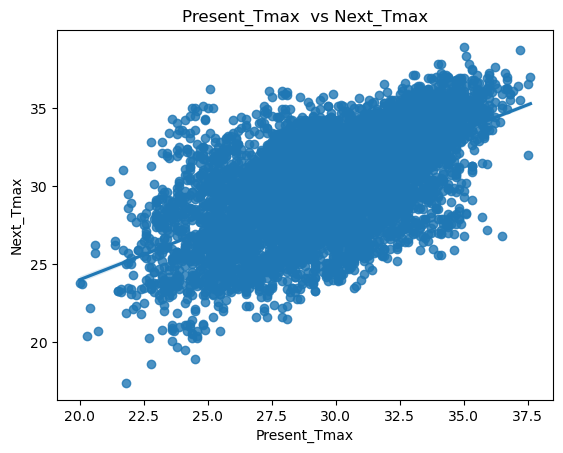

In [110]:
# analysing Present_Tmax  and Next_Tmax                   
plt.title("Present_Tmax  vs Next_Tmax")
sns.regplot(x="Present_Tmax",y="Next_Tmax",data=df_temp)
plt.show()


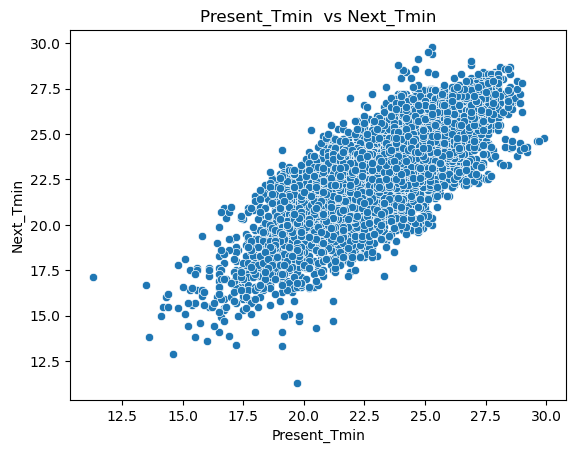

In [111]:
# analysing Present_Tmax  and Next_Tmax                   
plt.title("Present_Tmin  vs Next_Tmin")
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=df_temp)
plt.show()


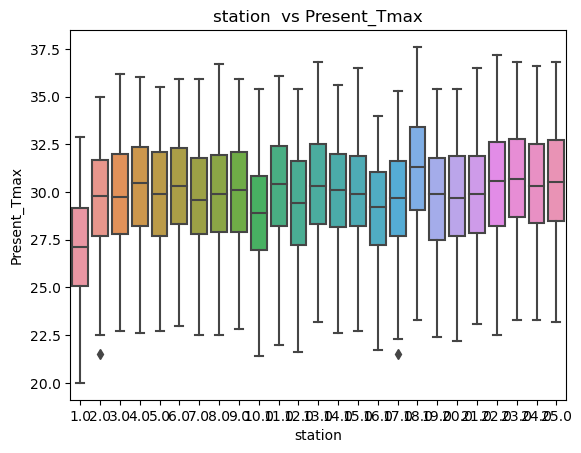

In [112]:
# analysing Station  and Present_Tmax                   
plt.title("station  vs Present_Tmax")
sns.boxplot(x="station",y="Present_Tmax",data=df_temp)
plt.show()


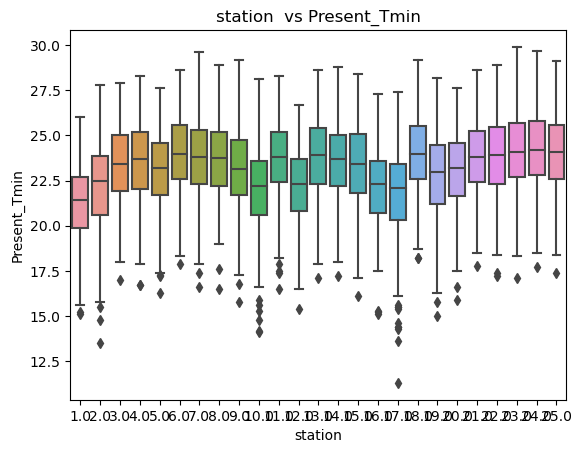

In [113]:
# analysing Station  and Present_Tmin                   
plt.title("station  vs Present_Tmin")
sns.boxplot(x="station",y="Present_Tmin",data=df_temp)
plt.show()


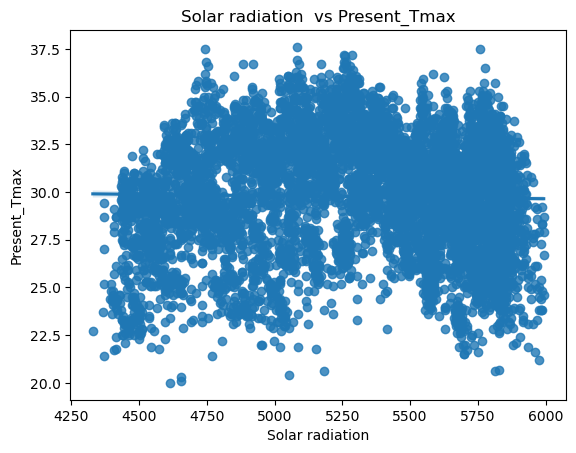

In [114]:
# analysing Present_Tmax  and Next_Tmax                   
plt.title("Solar radiation  vs Present_Tmax")
sns.regplot(x="Solar radiation",y="Present_Tmax",data=df_temp)
plt.show()


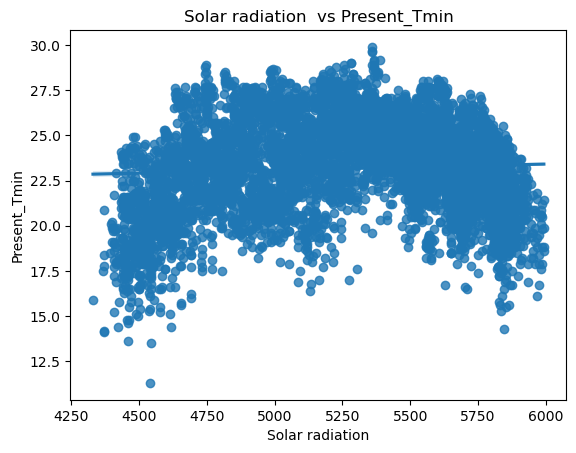

In [115]:
# analysing Present_Tmax  and Next_Tmin                   
plt.title("Solar radiation  vs Present_Tmin")
sns.regplot(x="Solar radiation",y="Present_Tmin",data=df_temp)
plt.show()


##### Observations:
1. from above two plots we can see the "Solar radiation" amout is directly proportional to temperature i.e if the radiation is higher then the present day temperature also high

## Feature Engineering:

In [11]:
# Encoding Categorical Columns:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_temp.columns:
    if df_temp[i].dtypes=="object":
        df_temp[i]=OE.fit_transform(df_temp[i].values.reshape(-1,1))    
df_temp       

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,288.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,288.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,288.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,288.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,288.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,302.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,302.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,302.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,302.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


## Outlier Detection:

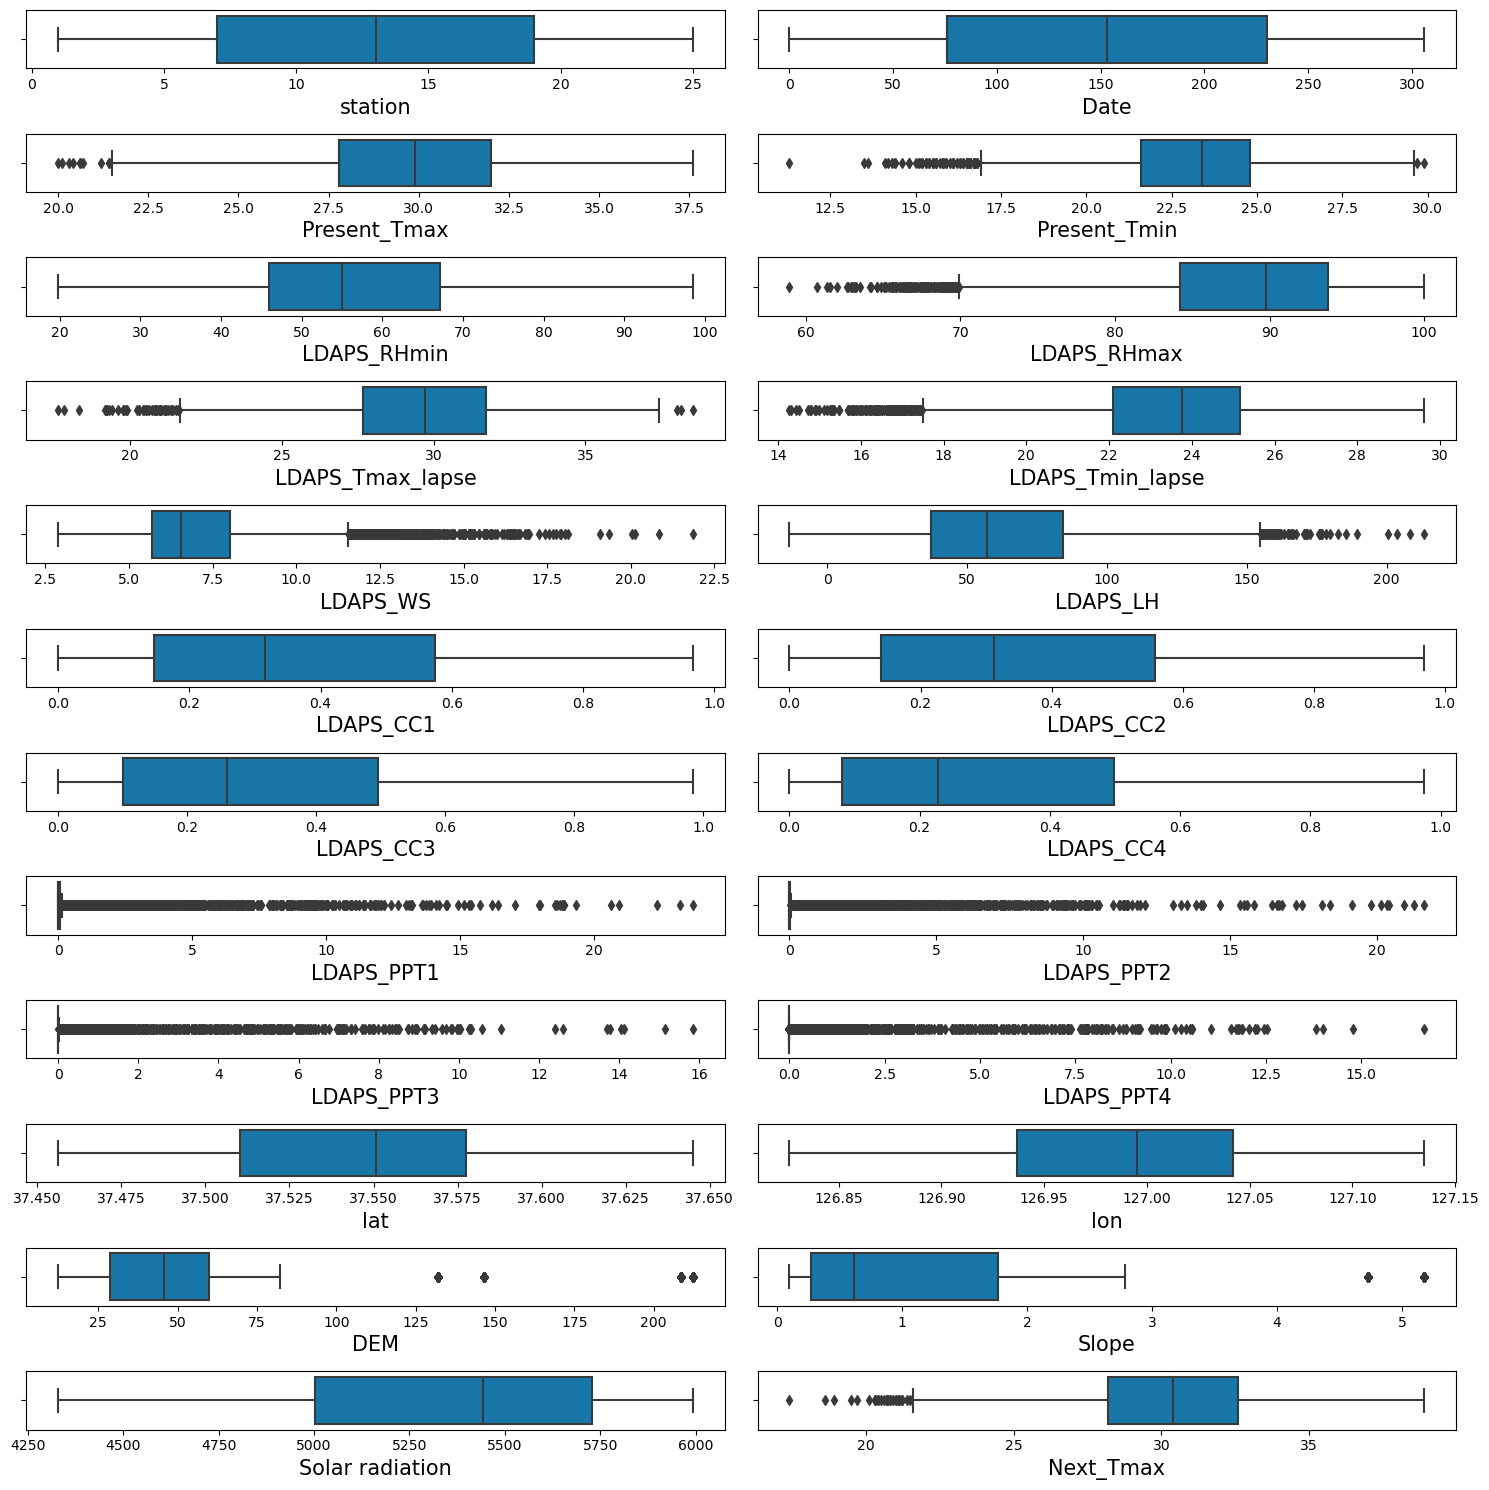

In [12]:
# checking for outliers
plt.figure(figsize=(15,15),facecolor="white")
plotnum=1
for i in df_temp.columns:
    if plotnum<=24:
        p=plt.subplot(12,2,plotnum)
        sns.boxplot(df_temp[i],palette='winter_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        plotnum+=1
plt.tight_layout()    

In [13]:
df_temp.drop(['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],axis=1,inplace=True)

In [14]:
# removing utliers from other columns using Z-Score method
from scipy.stats import zscore
out_features=df_temp[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','DEM','Slope']]
z=np.abs(zscore(out_features))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,DEM,Slope
0,0.353318,0.748029,0.382768,0.525269,0.215525,0.126423,0.206603,2.769091,1.111162
1,0.725138,0.664721,0.311697,0.078334,0.223368,0.644133,0.313359,0.315828,0.543220
2,0.624033,0.043400,0.609425,0.160080,0.449896,0.439100,1.244497,0.526719,0.723891
3,0.758840,0.085054,1.128335,0.028710,0.079238,0.663353,0.096026,0.298272,0.928888
4,0.556630,0.539758,0.249244,0.171981,0.010803,0.624327,1.349989,0.494848,0.549485
...,...,...,...,...,...,...,...,...,...
7745,2.240616,2.247578,1.402898,0.614083,2.223667,0.225479,1.569844,0.655747,0.500966
7746,2.442826,2.414195,0.648815,0.990460,2.432415,0.609132,0.583486,0.735482,0.820711
7747,2.173212,2.539157,1.318376,1.110333,2.021883,0.434188,0.283984,0.852919,0.804538
7748,2.173212,2.289232,1.537141,0.886737,2.039881,0.253241,0.452772,0.821476,0.755800


In [15]:
#threshold=3
np.where(z>3)

(array([  25,   33,   44,  175,  194,  268,  292,  341,  372,  391,  416,
         489,  514,  539,  564,  570,  579,  589,  958, 1454, 1612, 1621,
        1623, 1624, 1630, 1634, 1738, 1739, 1741, 1751, 1754, 2135, 2136,
        2137, 2138, 2139, 2139, 2140, 2141, 2141, 2142, 2143, 2144, 2145,
        2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156,
        2157, 2158, 2159, 2313, 2314, 2316, 2329, 2335, 2338, 2354, 2401,
        2486, 2502, 2527, 2633, 2733, 3061, 3073, 3148, 3159, 3166, 3168,
        3172, 3173, 3177, 3181, 3218, 3220, 3221, 3223, 3225, 3229, 3230,
        3243, 3246, 3255, 3332, 3335, 3350, 3356, 3360, 3362, 3363, 3364,
        3365, 3367, 3369, 3375, 3397, 3410, 3422, 3431, 3433, 3434, 3435,
        3436, 3437, 3438, 3438, 3439, 3440, 3441, 3442, 3442, 3443, 3444,
        3444, 3445, 3447, 3449, 3450, 3451, 3453, 3454, 3455, 3481, 3672,
        3892, 3898, 3917, 4415, 4416, 4418, 4424, 4434, 4492, 4504, 4531,
        4683, 4689, 4708, 4952, 4953, 

In [16]:
# we have to removethese rows which have outliers:
df_temp1=df_temp[(z<3).all(axis=1)]
df_temp1.shape          # after removing outliers the data frame size

(7328, 21)

In [17]:
df_temp.shape 

(7588, 21)

In [18]:
#data loss percentage:
print("data loss percentage",((df_temp.shape[0]-df_temp1.shape[0])/df_temp.shape[0])*100)

data loss percentage 3.4264628360569325


###### The data loss percentage is 3.42 which is affordable.. so we can proceed further

In [19]:
#checking for skewness present in the data:
df_temp1.skew()

station             0.000200
Date                0.007710
Present_Tmax       -0.221054
Present_Tmin       -0.211691
LDAPS_RHmin         0.282435
LDAPS_RHmax        -0.750789
LDAPS_Tmax_lapse   -0.096445
LDAPS_Tmin_lapse   -0.375972
LDAPS_WS            1.017383
LDAPS_LH            0.592215
LDAPS_CC1           0.479026
LDAPS_CC2           0.470458
LDAPS_CC3           0.637346
LDAPS_CC4           0.670804
lat                 0.103182
lon                -0.289917
DEM                 1.773696
Slope               1.597068
Solar radiation    -0.514832
Next_Tmax          -0.266139
Next_Tmin          -0.267519
dtype: float64

In [20]:
# applying log transform to reduce skewness
df_temp1['LDAPS_WS']=np.log2(df_temp1['LDAPS_WS']+1)
df_temp1['DEM']=np.log2(df_temp1['DEM']+1)
df_temp1['Slope']=np.log2(df_temp1['Slope']+1)

In [21]:
df_temp1.skew()

station             0.000200
Date                0.007710
Present_Tmax       -0.221054
Present_Tmin       -0.211691
LDAPS_RHmin         0.282435
LDAPS_RHmax        -0.750789
LDAPS_Tmax_lapse   -0.096445
LDAPS_Tmin_lapse   -0.375972
LDAPS_WS            0.426717
LDAPS_LH            0.592215
LDAPS_CC1           0.479026
LDAPS_CC2           0.470458
LDAPS_CC3           0.637346
LDAPS_CC4           0.670804
lat                 0.103182
lon                -0.289917
DEM                 0.455673
Slope               0.851723
Solar radiation    -0.514832
Next_Tmax          -0.266139
Next_Tmin          -0.267519
dtype: float64

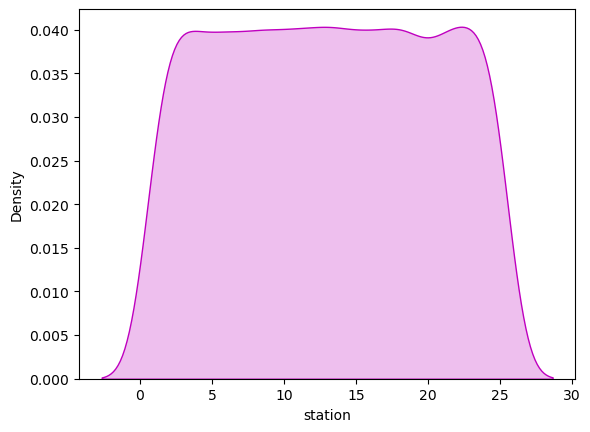

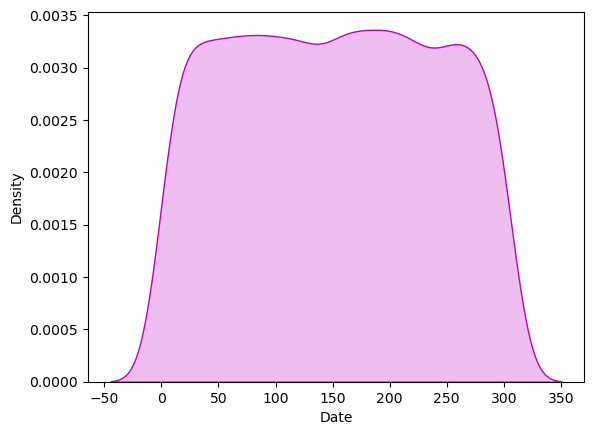

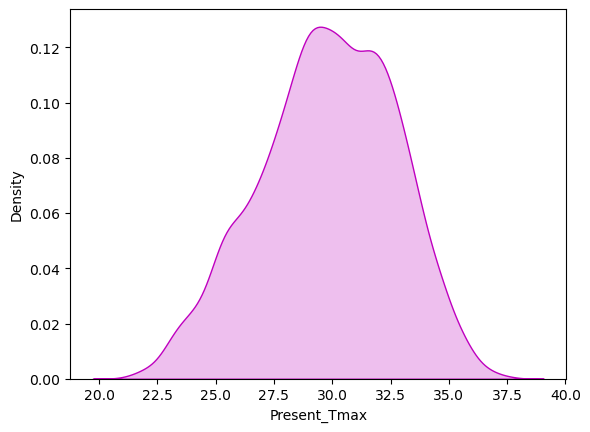

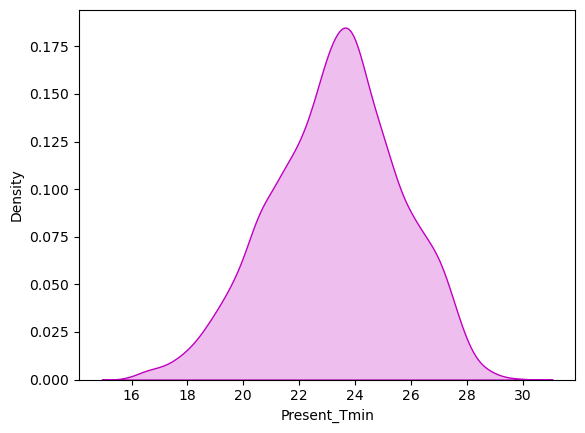

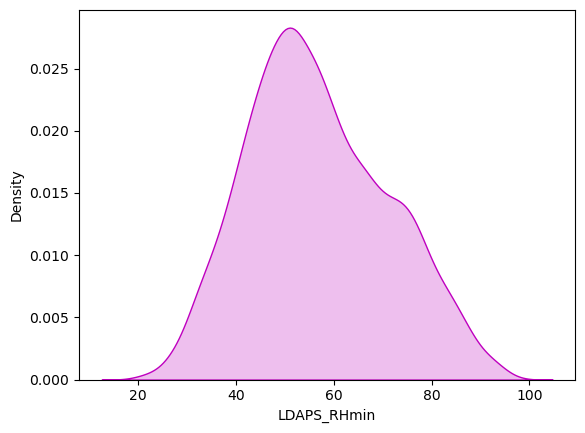

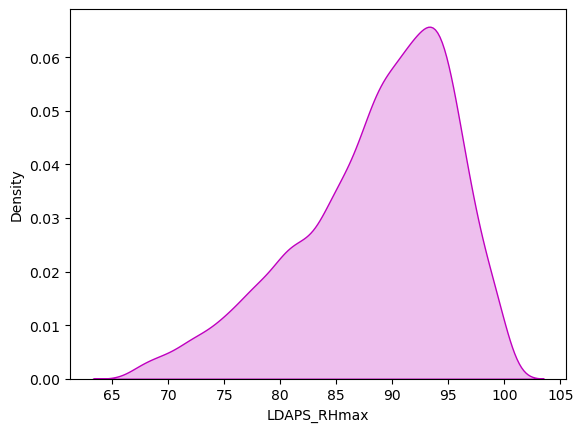

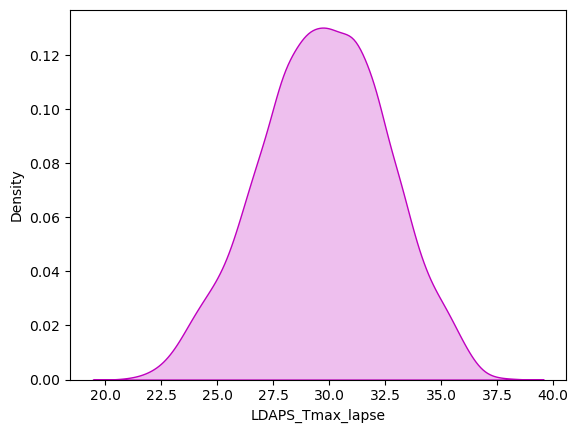

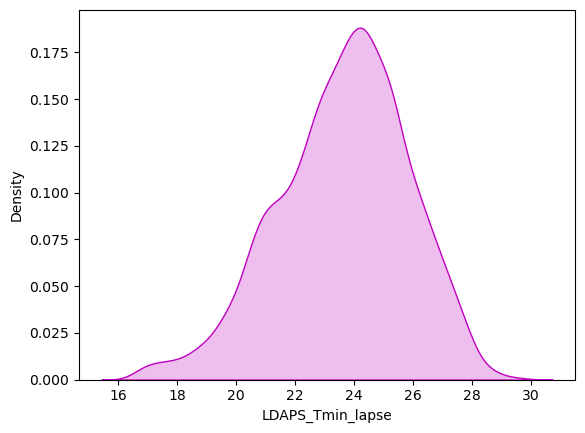

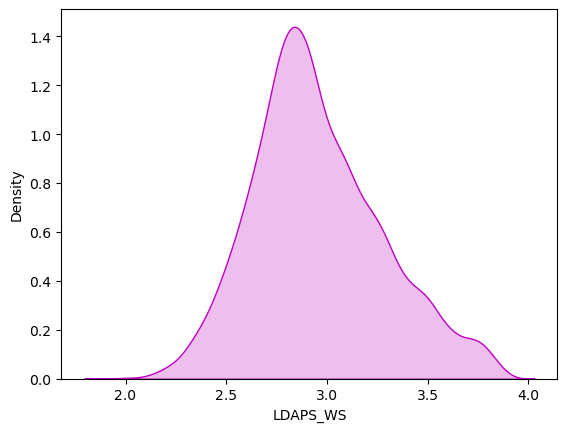

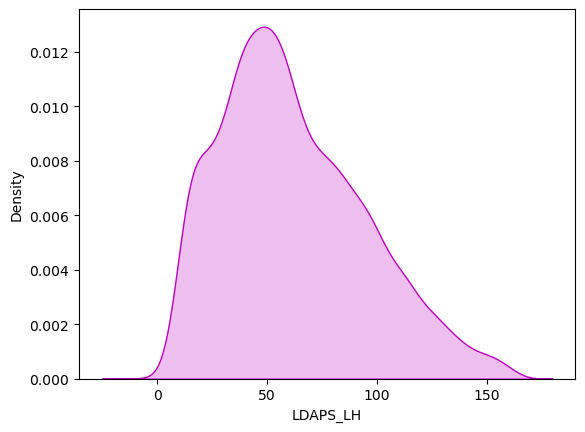

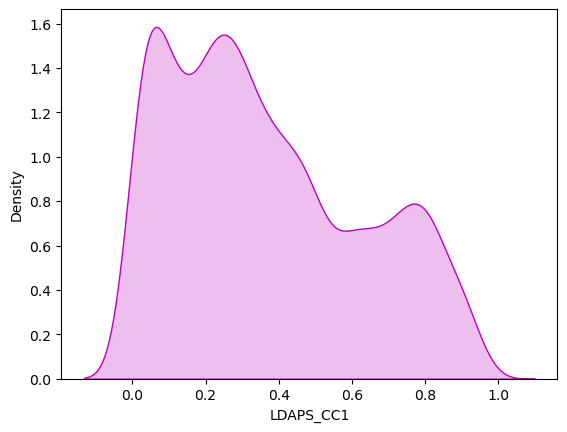

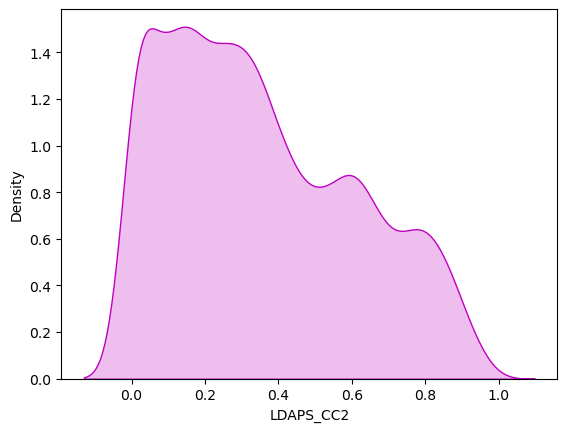

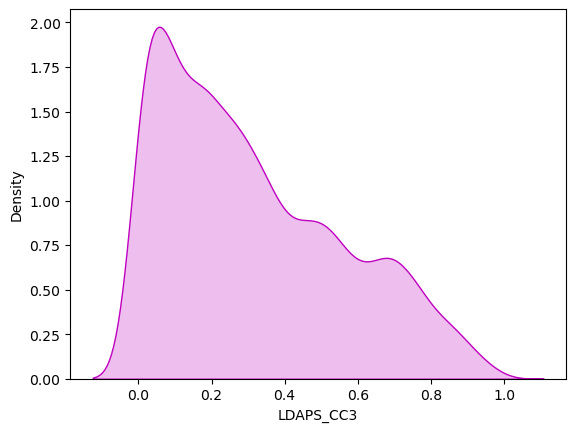

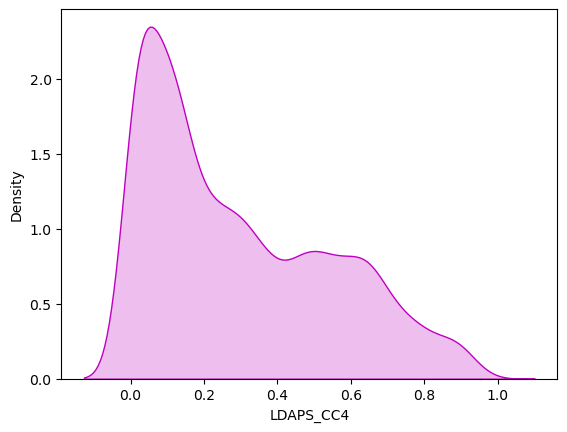

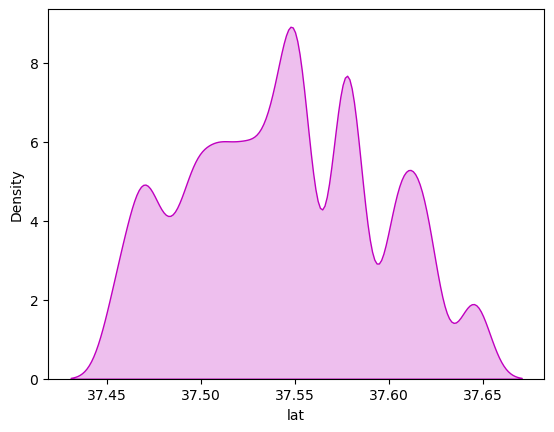

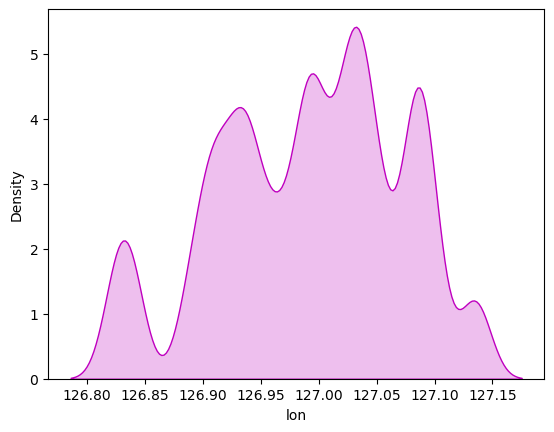

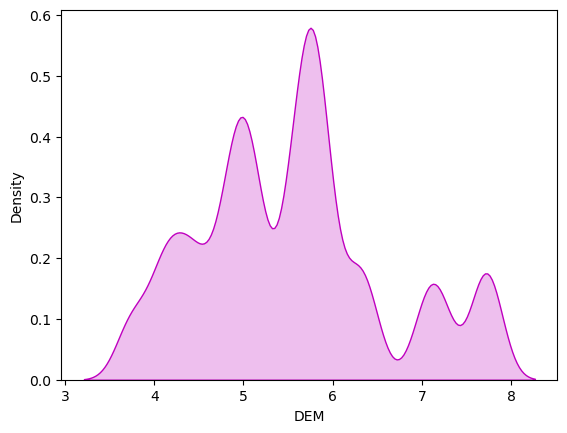

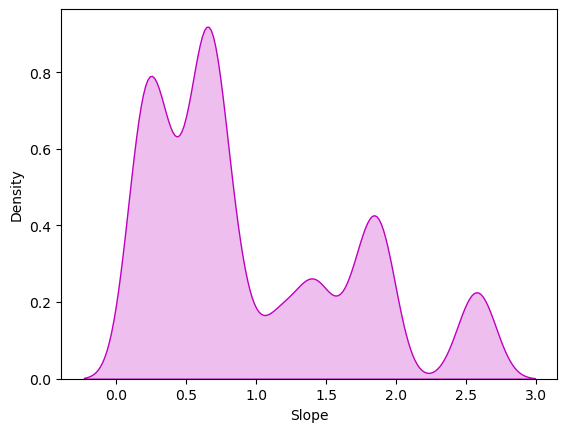

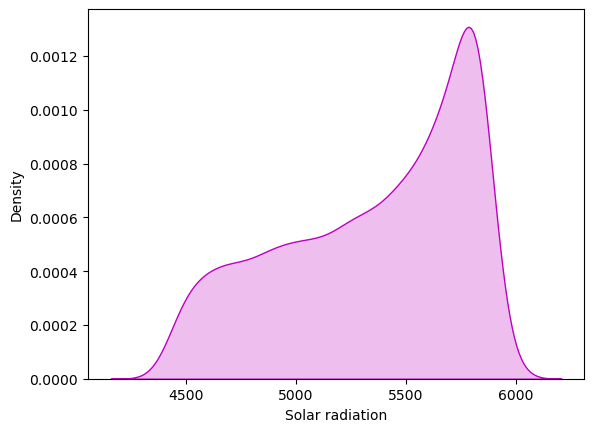

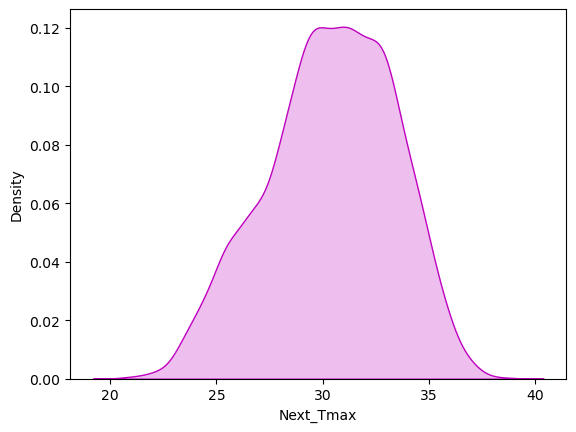

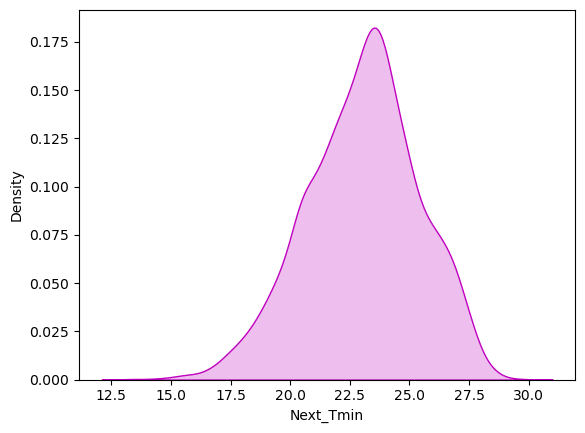

In [22]:
#visualizing the spreading of data
for i in df_temp1.columns:
    sns.distplot(df_temp1[i],color="m",kde_kws={"shade":True},hist=False)
    plt.show()

In [23]:
# corelation between target variable and features
corr=df_temp1.corr()
corr

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.002313,0.108991,0.133577,-0.067520,-0.170408,0.064851,0.103057,0.020952,-0.126085,...,0.003271,0.000839,0.006478,-0.242788,-0.122140,-0.311451,-0.126595,-0.026889,0.104583,0.127296
Date,0.002313,1.000000,-0.121629,-0.075771,-0.074323,-0.026306,-0.117640,-0.128434,-0.080745,-0.026235,...,-0.026957,-0.066175,-0.042577,-0.000030,-0.003998,-0.004660,-0.003814,-0.418905,-0.086884,-0.091488
Present_Tmax,0.108991,-0.121629,1.000000,0.607157,-0.207608,-0.316913,0.559283,0.617874,-0.127652,0.139321,...,-0.207659,-0.127642,-0.133803,-0.046559,0.010962,-0.145328,-0.097829,-0.072286,0.602242,0.613929
Present_Tmin,0.133577,-0.075771,0.607157,1.000000,0.124639,-0.037799,0.432853,0.758022,0.013608,0.000019,...,0.106422,0.011989,-0.041765,-0.073410,-0.041821,-0.249906,-0.155023,0.011211,0.428712,0.781831
LDAPS_RHmin,-0.067520,-0.074323,-0.207608,0.124639,1.000000,0.573708,-0.587434,0.095979,0.245819,-0.068428,...,0.745282,0.684200,0.507540,0.079356,-0.081473,0.064279,0.097100,0.257718,-0.456700,0.100100
LDAPS_RHmax,-0.170408,-0.026306,-0.316913,-0.037799,0.573708,1.000000,-0.405174,-0.146598,0.106288,0.248700,...,0.397446,0.219964,0.115668,0.193528,0.018545,0.166302,0.205288,0.166063,-0.319835,-0.102673
LDAPS_Tmax_lapse,0.064851,-0.117640,0.559283,0.432853,-0.587434,-0.405174,1.000000,0.622139,-0.233451,0.063004,...,-0.528919,-0.542355,-0.436022,-0.028850,0.098277,-0.126297,-0.129743,-0.001976,0.821287,0.556409
LDAPS_Tmin_lapse,0.103057,-0.128434,0.617874,0.758022,0.095979,-0.146598,0.622139,1.000000,-0.054494,-0.129752,...,0.072971,-0.018783,-0.070883,-0.086537,-0.022948,-0.181712,-0.174395,0.102300,0.557163,0.877287
LDAPS_WS,0.020952,-0.080745,-0.127652,0.013608,0.245819,0.106288,-0.233451,-0.054494,1.000000,-0.057818,...,0.235015,0.191471,0.191001,-0.014839,-0.074184,0.126459,0.111535,0.158087,-0.279480,-0.020485
LDAPS_LH,-0.126085,-0.026235,0.139321,0.000019,-0.068428,0.248700,0.063004,-0.129752,-0.057818,1.000000,...,-0.266315,-0.247602,-0.174297,0.122604,0.025988,0.035040,0.073049,-0.041993,0.181157,-0.045857


### Correlation With Target Variable "Next_Tmax":

In [24]:
corr['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.821287
Present_Tmax        0.602242
Next_Tmin           0.585711
LDAPS_Tmin_lapse    0.557163
Present_Tmin        0.428712
LDAPS_LH            0.181157
station             0.104583
lon                 0.003802
Solar radiation    -0.027740
lat                -0.044664
Date               -0.086884
Slope              -0.087833
DEM                -0.127832
LDAPS_WS           -0.279480
LDAPS_RHmax        -0.319835
LDAPS_RHmin        -0.456700
LDAPS_CC1          -0.458797
LDAPS_CC4          -0.464662
LDAPS_CC2          -0.499582
LDAPS_CC3          -0.522369
Name: Next_Tmax, dtype: float64

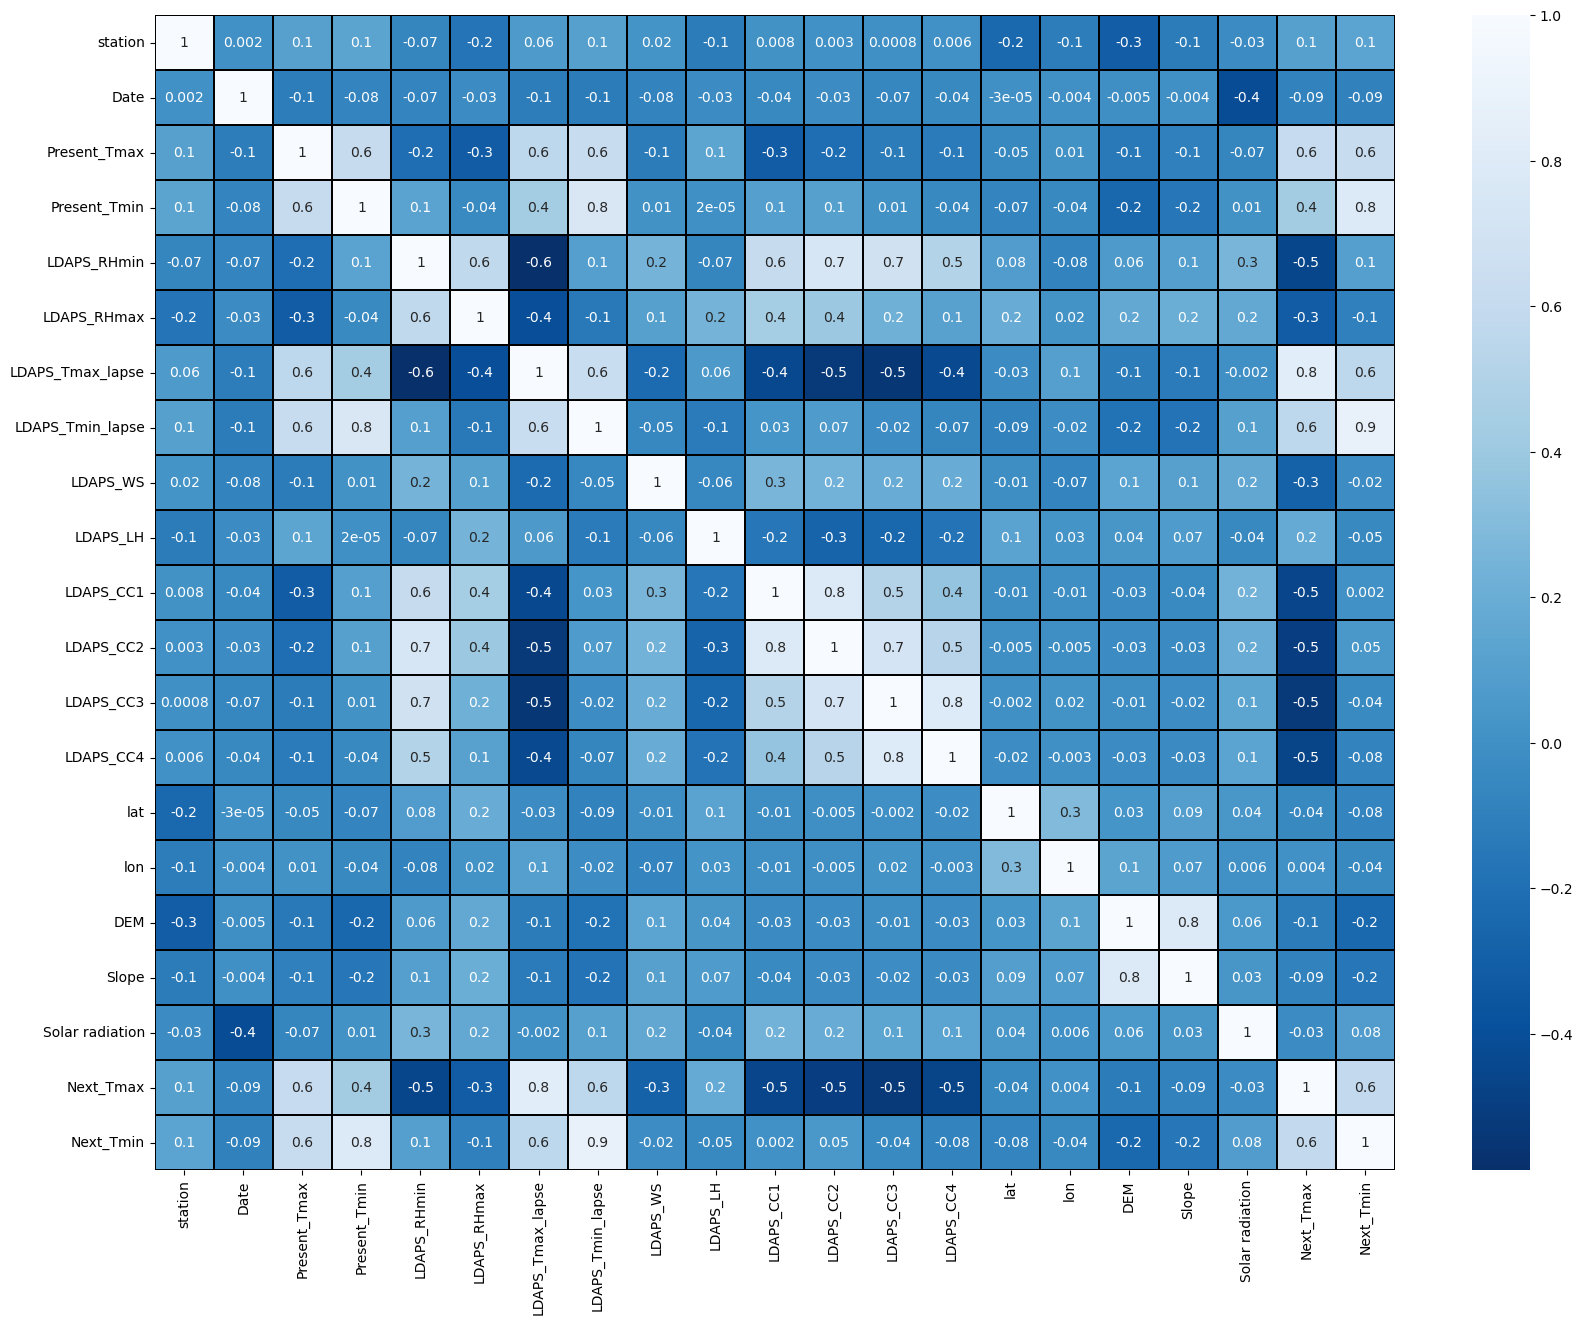

In [25]:
#visualizing the corelation matrix by using the heaatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_temp1.corr(),linewidth=0.1,fmt='0.1g',linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

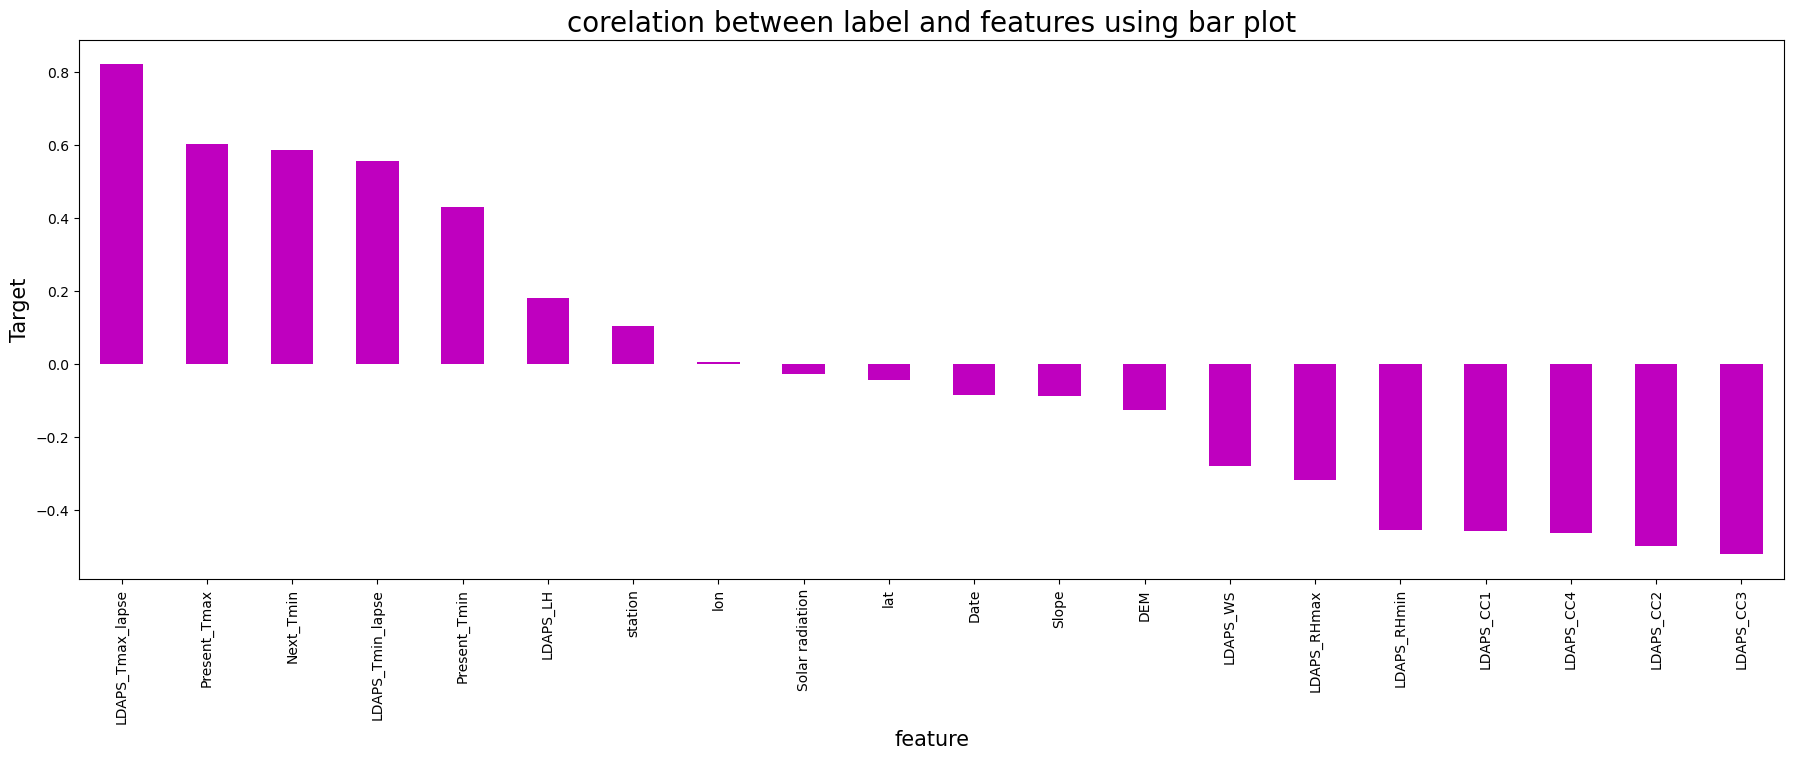

In [26]:
# visualizing the corelation using barplot:
plt.figure(figsize=(22,7))
df_temp1.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


## Target.1: "Next_Tmax" analysis:

In [27]:
#separating target variable and input variable

x=df_temp1.drop('Next_Tmax',axis=1)
y=df_temp1['Next_Tmax']

In [28]:
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,288.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.966963,69.451805,0.233947,0.203896,1.616969e-01,0.130928,37.6046,126.991,7.736977,1.920293,5992.895996,21.2
1,2.0,288.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,2.742414,51.937448,0.225508,0.251771,1.594441e-01,0.127727,37.6046,127.032,5.516091,0.598460,5869.312500,22.5
2,3.0,288.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,2.835565,20.573050,0.209344,0.257469,2.040915e-01,0.142125,37.5776,127.058,5.100423,0.340391,5863.555664,23.9
3,4.0,288.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,2.733365,65.727144,0.216372,0.226002,1.611574e-01,0.134249,37.6450,127.022,5.545845,1.821629,5856.964844,24.3
4,5.0,288.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,2.751679,107.965535,0.151407,0.249995,1.788925e-01,0.170021,37.5507,127.135,5.171447,0.590243,5859.552246,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,302.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.926617,9.614074,0.052902,0.030169,0.000000e+00,0.004380,37.5507,127.040,4.770723,0.652693,4456.024414,17.7
7746,22.0,302.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,2.758747,82.146707,0.066461,0.024518,5.850000e-07,0.017678,37.5102,127.086,4.521478,0.180403,4441.803711,17.1
7747,23.0,302.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,2.837725,72.058294,0.030034,0.081035,0.000000e+00,0.000000,37.5372,126.891,4.052033,0.208392,4443.313965,18.1
7748,24.0,302.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.915104,47.241457,0.035874,0.074962,0.000000e+00,0.000000,37.5237,126.909,4.193425,0.289598,4438.373535,18.8


In [29]:
x.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmin           0
dtype: int64

In [30]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.669612,1.548300,-0.378109,-0.817233,0.107968,0.380305,-0.588481,-0.277719,0.044216,0.231605,-0.504433,-0.584857,-0.621205,-0.661463,1.208316,-0.006956,2.096045,1.333852,1.526308,-0.769432
1,-1.530863,1.548300,0.724938,-0.730631,-0.307682,0.306599,0.039205,0.186581,-0.651100,-0.301812,-0.536667,-0.398201,-0.630346,-0.674206,1.208316,0.509489,-0.026564,-0.500430,1.233626,-0.220399
2,-1.392114,1.548300,0.621527,0.005489,-0.555514,-0.648668,0.124213,0.426222,-0.362657,-1.257045,-0.598409,-0.375986,-0.449183,-0.616886,0.669508,0.836991,-0.423839,-0.858548,1.219992,0.370867
3,-1.253364,1.548300,0.759408,0.048791,0.106865,1.153510,-0.012399,-0.133543,-0.679118,0.118167,-0.571563,-0.498668,-0.623394,-0.648244,2.014534,0.383527,0.001873,1.196937,1.204383,0.539800
4,-1.114615,1.548300,0.552587,-0.600727,-0.036420,0.241832,-0.221098,-0.061147,-0.622410,1.404578,-0.819702,-0.405126,-0.551431,-0.505831,0.132695,1.806901,-0.355957,-0.511834,1.210511,-0.220399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,1.105375,1.707413,-2.308443,-2.376077,-2.220356,-1.471556,-0.680838,-2.402111,-0.080716,-1.590812,-1.195948,-1.262174,-1.277313,-1.165263,0.132695,0.610259,-0.738949,-0.425173,-2.113462,-2.247598
7324,1.244124,1.707413,-2.515264,-2.549281,-1.845384,-0.689518,-1.072233,-2.622943,-0.600523,0.618240,-1.144159,-1.284204,-1.277311,-1.112323,-0.675518,1.189685,-0.977165,-1.080561,-2.147141,-2.500998
7325,1.382874,1.707413,-2.239502,-2.679185,-2.077999,-1.383900,-1.196889,-2.188645,-0.355970,0.310988,-1.283294,-1.063860,-1.277313,-1.182700,-0.136710,-1.266580,-1.425836,-1.041720,-2.143564,-2.078665
7326,1.521623,1.707413,-2.239502,-2.419378,-2.265330,-1.610774,-0.964371,-2.207685,-0.116366,-0.444833,-1.260989,-1.087536,-1.277313,-1.182700,-0.406114,-1.039847,-1.290701,-0.929032,-2.155265,-1.783032


-> as per the graph we can ssee that the first 11 component contributes about 90% of data.. so we can take this 11 component as the Principal Components

In [31]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7328, dtype: float64

###### here we can see the Target variable contains continues float type variable so we can apply regression model to the given problem statement

# modeling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge


In [33]:
# finding the best random state
maxAcc=0
maxRs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum r2_score is",maxAcc, "on random_state",maxRs)        

maximum r2_score is 0.8003424638612637 on random_state 191


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5496, 20)
(5496,)
(1832, 20)
(1832,)


In [35]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lr))
print('r2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score: 0.8003424638612637
r2_score on training Data: 77.0509661492663
mean absolute error: 1.07583497702075
Mean Squared Error:- 1.9786230660392228
Root Mean Squrared Error:- 1.4066353706768584


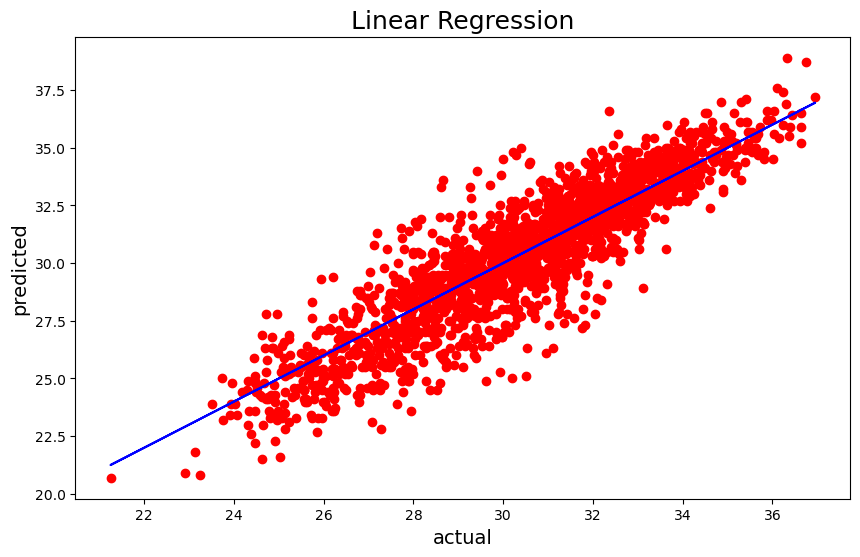

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lr,y=y_test,color="r")
plt.plot(pred_lr,pred_lr,color="b")
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [37]:
# Random Forest model:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.9176716695731545
R2_score on training Data: 98.59287803473671
mean absolute error: 0.6806157205240176
Mean Squared Error:- 0.8158807161572057
Root Mean Squrared Error:- 0.9032611561210887


In [38]:
# KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.8624619670034162
R2_score on training Data: 89.60147416368851
mean absolute error: 0.8876419213973799
Mean Squared Error:- 1.3630135371179037
Root Mean Squrared Error:- 1.1674817074018349


In [39]:
# GBR
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.8697340407103422
R2_score on training Data: 87.32720272293044
mean absolute error: 0.8799122896708941
Mean Squared Error:- 1.2909466717607005
Root Mean Squrared Error:- 1.1361983417347081


In [40]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: 0.5576099577393403
R2_score on training Data: 55.06998184011249
mean absolute error: 1.6835856348019598
Mean Squared Error:- 4.384122727001754
Root Mean Squrared Error:- 2.093829679558907


In [41]:
#Ridge:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('r2_score:',r2_score(y_test,pred_ridge))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_ridge))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

r2_score: 0.8003253248464995
R2_score on training Data: 77.05095095533612
mean absolute error: 1.0758694749666116
Mean Squared Error:- 1.9787929151247994
Root Mean Squrared Error:- 1.4066957436221947


In [42]:
#Decision Tree:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score: 0.8063235055974103
R2_score on training Data: 100.0
mean absolute error: 0.992740174672489
Mean Squared Error:- 1.9193504366812226
Root Mean Squrared Error:- 1.3854062352542025


In [43]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_svr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_svr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

r2_score: 0.871824230809863
R2_score on training Data: 88.20773847153313
mean absolute error: 0.8194330501656513
Mean Squared Error:- 1.2702327111294072
Root Mean Squrared Error:- 1.1270460110968883


In [44]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [45]:
from xgboost import XGBRegressor
xgbr=model = XGBRegressor()
xgbr.fit(x_train,y_train)
pred_xgbr=xgbr.predict(x_test)
pred_train=xgbr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_xgbr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_xgbr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_xgbr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_xgbr)))

r2_score: 0.9359263631654177
R2_score on training Data: 99.29845380762299
mean absolute error: 0.6021693113068828
Mean Squared Error:- 0.634975159053505
Root Mean Squrared Error:- 0.7968532857769396


###### from above we can see Random Forest model performs better.. now cross validating the models:

In [46]:
# cross validation of the model:
from sklearn.model_selection import cross_val_score

In [47]:
scoreLR=cross_val_score(LR,x,y,cv=5,scoring='r2')             #CROSS VALIDATION FOR LINEAR REGRESSOR
print(scoreLR)
print(scoreLR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lr)-scoreLR.mean())*100)

[0.71284369 0.66703298 0.70549669 0.80526657 0.67531532]
0.7131910504828726
difference between r2 score and cross validation score is: 8.715141337839116


In [48]:
scoreRFR=cross_val_score(RFR,x,y,cv=5,scoring='r2')        #CROSS VALIDATION FOR RANDOM FOREST
print(scoreRFR)
print(scoreRFR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_RFR)-scoreRFR.mean())*100)

[0.72837977 0.64792968 0.65984624 0.78481921 0.64234752]
0.6926644828743386
difference between r2 score and cross validation score is: 22.500718669881593


In [49]:
scoreknn=cross_val_score(knn,x,y,cv=5,scoring='r2')            # CROSS VALIDATION FOR KNN
print(scoreknn)
print(scoreknn.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_knn)-scoreknn.mean())*100)

[0.62566422 0.46436086 0.50153121 0.76493988 0.61596117]
0.5944914692557838
difference between r2 score and cross validation score is: 26.797049774763238


In [50]:
scoreGBR=cross_val_score(GBR,x,y,cv=5,scoring='r2')             #cross validation for gbr
print(scoreGBR)
print(scoreGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_GBR)-scoreGBR.mean())*100)

[0.72911939 0.65067297 0.69198465 0.81992873 0.65712807]
0.709766764598195
difference between r2 score and cross validation score is: 15.996727611214723


In [51]:
scoreL=cross_val_score(lasso,x,y,cv=5,scoring='r2')            #cross validation for lasso
print(scoreL) 
print(scoreL.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lasso)-scoreL.mean())*100)

[0.5042991  0.50530791 0.55828247 0.47060546 0.559586  ]
0.5196161858571149
difference between r2 score and cross validation score is: 3.7993771882225413


In [52]:
scoreR=cross_val_score(ridge,x,y,cv=5,scoring='r2')          #cross validation for ridge
print(scoreR)
print(scoreR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_ridge)-scoreR.mean())*100)

[0.71297256 0.66697389 0.7054627  0.80532244 0.67536549]
0.7132194168831409
difference between r2 score and cross validation score is: 8.71059079633586


In [53]:
scoreSVR=cross_val_score(svr,x,y,cv=5,scoring='r2')             #cross validation for svr
print(scoreSVR)
print(scoreSVR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_svr)-scoreSVR.mean())*100)

[0.70429905 0.5914     0.65350434 0.81071045 0.67435786]
0.6868543413118257
difference between r2 score and cross validation score is: 18.49698894980374


In [54]:
scoreDTR=cross_val_score(dtr,x,y,cv=5,scoring='r2')             #cross validation for dtr
print(scoreDTR)
print(scoreDTR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_dtr)-scoreDTR.mean())*100)

[0.36031981 0.41814089 0.3369794  0.63673423 0.38226886]
0.4268886379361554
difference between r2 score and cross validation score is: 37.94348676612549


In [55]:
scoreXGBR=cross_val_score(xgbr,x,y,cv=5,scoring='r2')             #cross validation for xgbr
print(scoreXGBR)
print(scoreXGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_xgbr)-scoreXGBR.mean())*100)

[0.70846169 0.62008311 0.64046529 0.77405356 0.62898373]
0.6744094778360378
difference between r2 score and cross validation score is: 26.15168853293799


-> From varifying the r2 scoe and the cross validation score we can conclude that ridge regression model provides better result

## Hyper Parameter Tuning:

In [56]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }
GCV = GridSearchCV(XGBRegressor(),parameter,cv =5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
       

In [57]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 8,
 'n_estimators': 100}

In [58]:
modelR=XGBRegressor(booster= 'gbtree',eta= 0.1,gamma= 0.0,max_depth= 8,n_estimators= 100 )

# Final Model

In [59]:
#  Final Model:
modelR.fit(x_train,y_train)
pred=modelR.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

93.48344716967102


### The Final Model we are getting 93.58% accuracy

In [60]:
import joblib
joblib.dump(modelR,'Tempreture Next_Tmax prediction')


['Tempreture Next_Tmax prediction']

In [61]:
TEMP_Max=joblib.load('Tempreture Next_Tmax prediction')
predictionM=TEMP_Max.predict(x_test)
predictionM

array([34.585266, 31.258757, 34.3732  , ..., 32.265106, 32.791   ,
       26.23414 ], dtype=float32)

In [62]:
a=np.array(y_test)
DF_TEMP_Tmax=pd.DataFrame()
DF_TEMP_Tmax['predicted']=predictionM
DF_TEMP_Tmax['original']=a
DF_TEMP_Tmax

,predicted,original
0,34.585266,34.6
1,31.258757,31.5
2,34.373199,33.9
3,27.915665,28.8
4,30.218092,29.5
...,...,...
1827,32.871502,33.6
1828,35.131062,35.7
1829,32.265106,32.6
1830,32.791000,33.4


### Part.2: Next_Tmin Analysis:

In [547]:
df_temp2=df_temp1.copy()
df_temp2

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,288.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.966963,69.451805,...,0.203896,1.616969e-01,0.130928,37.6046,126.991,7.736977,1.920293,5992.895996,29.1,21.2
1,2.0,288.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,2.742414,51.937448,...,0.251771,1.594441e-01,0.127727,37.6046,127.032,5.516091,0.598460,5869.312500,30.5,22.5
2,3.0,288.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,2.835565,20.573050,...,0.257469,2.040915e-01,0.142125,37.5776,127.058,5.100423,0.340391,5863.555664,31.1,23.9
3,4.0,288.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,2.733365,65.727144,...,0.226002,1.611574e-01,0.134249,37.6450,127.022,5.545845,1.821629,5856.964844,31.7,24.3
4,5.0,288.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,2.751679,107.965535,...,0.249995,1.788925e-01,0.170021,37.5507,127.135,5.171447,0.590243,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,302.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.926617,9.614074,...,0.030169,0.000000e+00,0.004380,37.5507,127.040,4.770723,0.652693,4456.024414,27.6,17.7
7746,22.0,302.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,2.758747,82.146707,...,0.024518,5.850000e-07,0.017678,37.5102,127.086,4.521478,0.180403,4441.803711,28.0,17.1
7747,23.0,302.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,2.837725,72.058294,...,0.081035,0.000000e+00,0.000000,37.5372,126.891,4.052033,0.208392,4443.313965,28.3,18.1
7748,24.0,302.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.915104,47.241457,...,0.074962,0.000000e+00,0.000000,37.5237,126.909,4.193425,0.289598,4438.373535,28.6,18.8


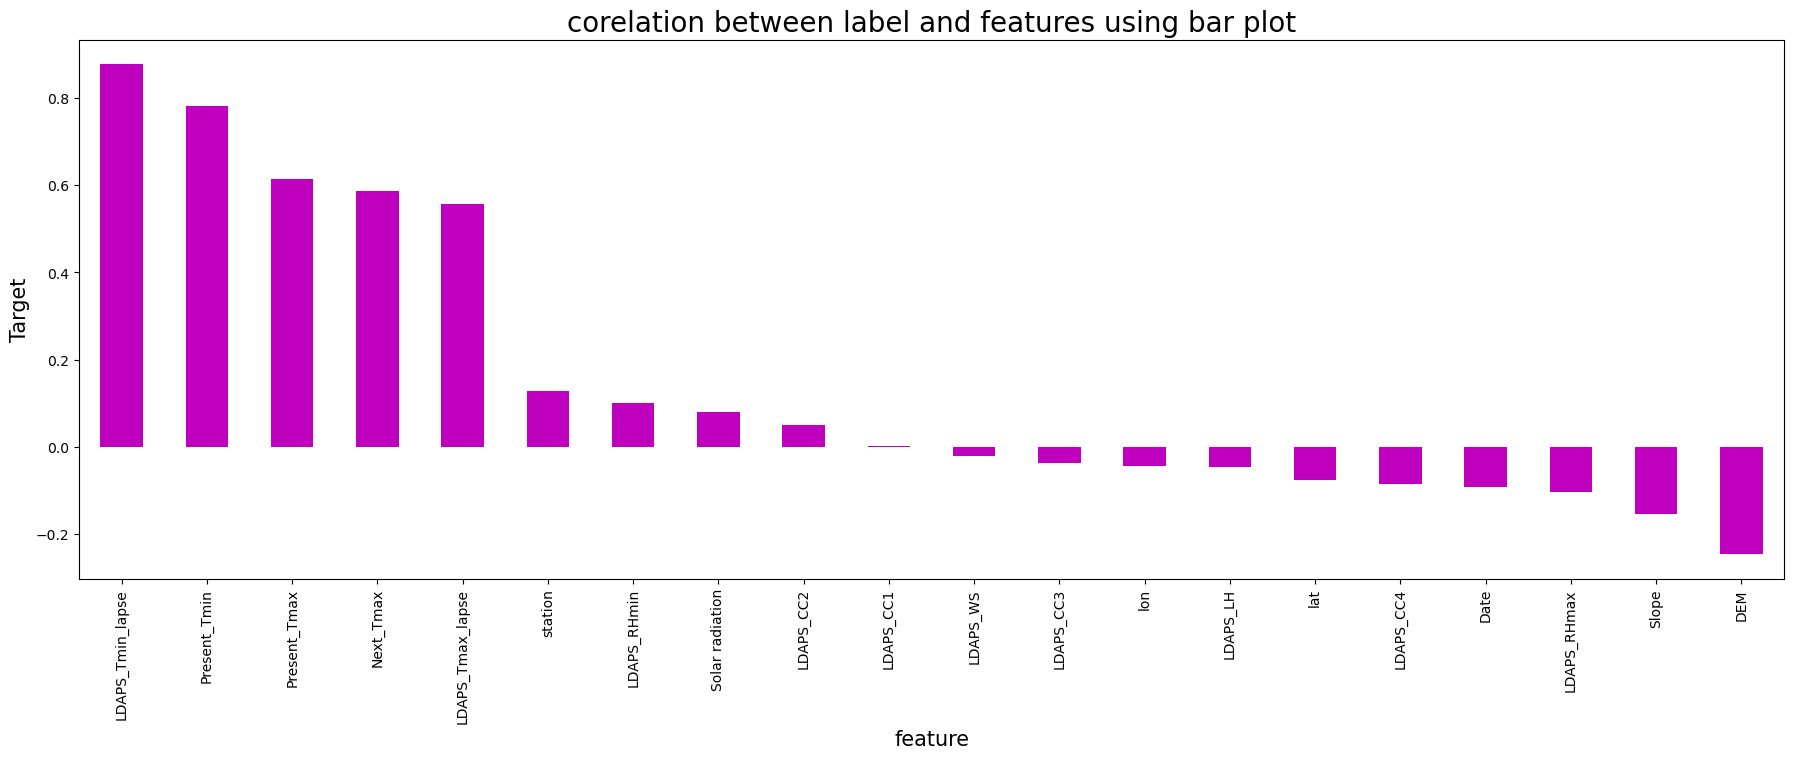

In [548]:
# visualizing the corelation using barplot:
plt.figure(figsize=(22,7))
df_temp2.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


In [549]:
#separating target variable and input variable

x1=df_temp2.drop('Next_Tmin',axis=1)
y1=df_temp2['Next_Tmin']

In [550]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.669612,1.548300,-0.378109,-0.817233,0.107968,0.380305,-0.588481,-0.277719,0.044216,0.231605,-0.504433,-0.584857,-0.621205,-0.661463,1.208316,-0.006956,2.096045,1.333852,1.526308,-0.422871
1,-1.530863,1.548300,0.724938,-0.730631,-0.307682,0.306599,0.039205,0.186581,-0.651100,-0.301812,-0.536667,-0.398201,-0.630346,-0.674206,1.208316,0.509489,-0.026564,-0.500430,1.233626,0.042709
2,-1.392114,1.548300,0.621527,0.005489,-0.555514,-0.648668,0.124213,0.426222,-0.362657,-1.257045,-0.598409,-0.375986,-0.449183,-0.616886,0.669508,0.836991,-0.423839,-0.858548,1.219992,0.242243
3,-1.253364,1.548300,0.759408,0.048791,0.106865,1.153510,-0.012399,-0.133543,-0.679118,0.118167,-0.571563,-0.498668,-0.623394,-0.648244,2.014534,0.383527,0.001873,1.196937,1.204383,0.441777
4,-1.114615,1.548300,0.552587,-0.600727,-0.036420,0.241832,-0.221098,-0.061147,-0.622410,1.404578,-0.819702,-0.405126,-0.551431,-0.505831,0.132695,1.806901,-0.355957,-0.511834,1.210511,0.275498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,1.105375,1.707413,-2.308443,-2.376077,-2.220356,-1.471556,-0.680838,-2.402111,-0.080716,-1.590812,-1.195948,-1.262174,-1.277313,-1.165263,0.132695,0.610259,-0.738949,-0.425173,-2.113462,-0.921706
7324,1.244124,1.707413,-2.515264,-2.549281,-1.845384,-0.689518,-1.072233,-2.622943,-0.600523,0.618240,-1.144159,-1.284204,-1.277311,-1.112323,-0.675518,1.189685,-0.977165,-1.080561,-2.147141,-0.788683
7325,1.382874,1.707413,-2.239502,-2.679185,-2.077999,-1.383900,-1.196889,-2.188645,-0.355970,0.310988,-1.283294,-1.063860,-1.277313,-1.182700,-0.136710,-1.266580,-1.425836,-1.041720,-2.143564,-0.688916
7326,1.521623,1.707413,-2.239502,-2.419378,-2.265330,-1.610774,-0.964371,-2.207685,-0.116366,-0.444833,-1.260989,-1.087536,-1.277313,-1.182700,-0.406114,-1.039847,-1.290701,-0.929032,-2.155265,-0.589149


In [551]:
y1.value_counts()

23.5    157
24.0    151
23.4    150
23.2    146
23.8    141
       ... 
29.5      1
29.1      1
28.5      1
29.8      1
16.2      1
Name: Next_Tmin, Length: 146, dtype: int64

# modeling

In [552]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge


In [553]:
# finding the best random state
maxAcc=0
maxRs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum r2_score is",maxAcc, "on random_state",maxRs)        

maximum r2_score is 0.8528299555814407 on random_state 402


In [554]:
# creating train test split:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5496, 20)
(5496,)
(1832, 20)
(1832,)


In [555]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lr))
print('r2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score: 0.8528299555814407
r2_score on training Data: 83.04735242391958
mean absolute error: 0.7386323242771784
Mean Squared Error:- 0.8732067792336432
Root Mean Squrared Error:- 0.9344553382766044


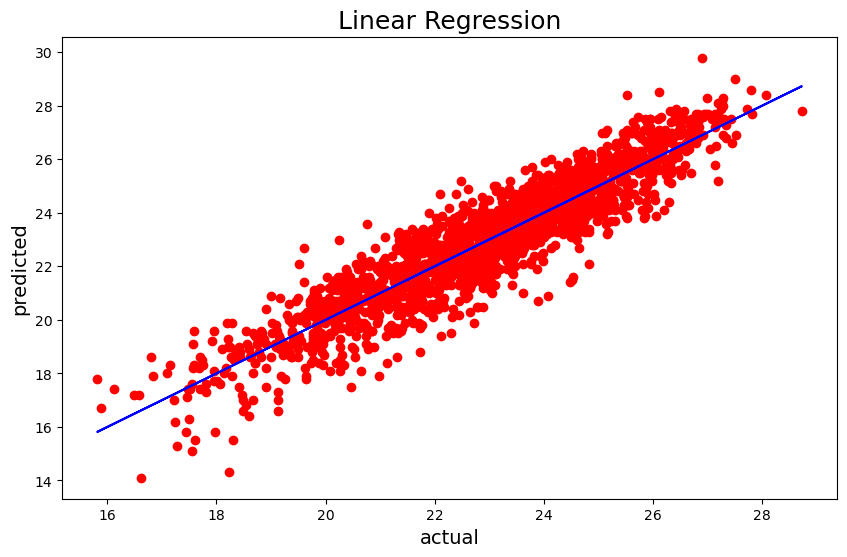

In [557]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lr,y=y_test,color="r")
plt.plot(pred_lr,pred_lr,color="b")
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [556]:
# Random Forest model:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.9104032727453852
R2_score on training Data: 98.59962736835742
mean absolute error: 0.551584061135371
Mean Squared Error:- 0.5316059388646286
Root Mean Squrared Error:- 0.7291131180171075


In [558]:
# KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.8718520958919408
R2_score on training Data: 90.9456616791051
mean absolute error: 0.6678165938864628
Mean Squared Error:- 0.7603423580786026
Root Mean Squrared Error:- 0.871976122424578


In [559]:
# GBR
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.8978402835522162
R2_score on training Data: 90.42851991137373
mean absolute error: 0.6082350098859602
Mean Squared Error:- 0.6061461577947438
Root Mean Squrared Error:- 0.7785538888187148


In [560]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: 0.5993245350071885
R2_score on training Data: 58.46895965630582
mean absolute error: 1.2252919917394527
Mean Squared Error:- 2.3773352361657207
Root Mean Squrared Error:- 1.5418609652513162


In [561]:
#Ridge:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('r2_score:',r2_score(y_test,pred_ridge))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_ridge))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

r2_score: 0.8528294252402204
R2_score on training Data: 83.04734418707056
mean absolute error: 0.7386394041206152
Mean Squared Error:- 0.8732099259171318
Root Mean Squrared Error:- 0.9344570219743291


In [562]:
#etr
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_etr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_etr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))


r2_score: 0.916644067152783
R2_score on training Data: 100.0
mean absolute error: 0.5268176855895197
Mean Squared Error:- 0.4945773165938865
Root Mean Squrared Error:- 0.703261911803765


In [563]:
from xgboost import XGBRegressor
xgbr=model = XGBRegressor()
xgbr.fit(x_train,y_train)
pred_xgbr=xgbr.predict(x_test)
pred_train=xgbr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_xgbr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_xgbr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_xgbr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_xgbr)))

r2_score: 0.9375070219701979
R2_score on training Data: 99.37889605956497
mean absolute error: 0.45700383665259753
Mean Squared Error:- 0.3707907562691523
Root Mean Squrared Error:- 0.6089259037593592


# Cross Validating the models:

In [564]:
from sklearn.model_selection import cross_val_score

In [566]:
scoreLR=cross_val_score(LR,x1,y1,cv=5,scoring='r2')             #CROSS VALIDATION FOR LINEAR REGRESSOR
print(scoreLR)
print(scoreLR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lr)-scoreLR.mean())*100)

[0.71911304 0.66526025 0.8137781  0.88555596 0.84954211]
0.7866498907135753
difference between r2 score and cross validation score is: 6.618006486786543


In [567]:
scoreRFR=cross_val_score(RFR,x1,y1,cv=5,scoring='r2')        #CROSS VALIDATION FOR RANDOM FOREST
print(scoreRFR)
print(scoreRFR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_RFR)-scoreRFR.mean())*100)

[0.66645025 0.69057954 0.81403651 0.87897795 0.84135625]
0.7782800987279834
difference between r2 score and cross validation score is: 13.212317401740181


In [568]:
scoreknn=cross_val_score(knn,x,y,cv=5,scoring='r2')            # CROSS VALIDATION FOR KNN
print(scoreknn)
print(scoreknn.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_knn)-scoreknn.mean())*100)

[0.54496961 0.55008991 0.67312177 0.76151704 0.7861234 ]
0.6631643447054356
difference between r2 score and cross validation score is: 20.868775118650518


In [569]:
scoreGBR=cross_val_score(GBR,x,y,cv=5,scoring='r2')             #cross validation for gbr
print(scoreGBR)
print(scoreGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_GBR)-scoreGBR.mean())*100)

[0.68268598 0.69119758 0.82748688 0.88046406 0.86722621]
0.7898121444293867
difference between r2 score and cross validation score is: 10.80281391228295


In [570]:
scoreL=cross_val_score(lasso,x,y,cv=5,scoring='r2')            #cross validation for lasso
print(scoreL) 
print(scoreL.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lasso)-scoreL.mean())*100)

[0.524804   0.392486   0.57323751 0.50218283 0.62580624]
0.5237033157765201
difference between r2 score and cross validation score is: 7.562121923066845


In [571]:
scoreR=cross_val_score(ridge,x,y,cv=5,scoring='r2')          #cross validation for ridge
print(scoreR)
print(scoreR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_ridge)-scoreR.mean())*100)

[0.71915826 0.66529647 0.81375229 0.88556156 0.84955757]
0.7866652261891296
difference between r2 score and cross validation score is: 6.616419905109083


In [572]:
scoreSVR=cross_val_score(svr,x,y,cv=5,scoring='r2')             #cross validation for svr
print(scoreSVR)
print(scoreSVR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_svr)-scoreSVR.mean())*100)

[0.63744223 0.67991369 0.79735982 0.85144688 0.8164109 ]
0.7565147037911367
difference between r2 score and cross validation score is: -1134.3255463635992


In [573]:
scoreDTR=cross_val_score(dtr,x,y,cv=5,scoring='r2')             #cross validation for dtr
print(scoreDTR)
print(scoreDTR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_dtr)-scoreDTR.mean())*100)

[0.3452853  0.46288207 0.62973288 0.76021352 0.6378369 ]
0.5671901330271171
difference between r2 score and cross validation score is: -1125.1502070974677


In [574]:
scoreXGBR=cross_val_score(xgbr,x,y,cv=5,scoring='r2')             #cross validation for xgbr
print(scoreXGBR)
print(scoreXGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_xgbr)-scoreXGBR.mean())*100)

[0.63375522 0.69063463 0.81458653 0.87066624 0.838765  ]
0.7696815226549594
difference between r2 score and cross validation score is: 16.78254993152385


## Hyper Parameter Tuning(XGBR):

In [575]:
from sklearn.model_selection import GridSearchCV

In [576]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [577]:
GCV = GridSearchCV(XGBRegressor(),parameter,cv =5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
       

In [578]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.1,
 'max_depth': 6,
 'n_estimators': 100}

In [579]:
MODEL_TEMP=XGBRegressor(booster= 'gbtree',eta= 0.1,gamma= 0.1,max_depth= 6,n_estimators= 100 )

# Final Model

In [581]:
#  Final Model:
MODEL_TEMP.fit(x_train,y_train)
pred=MODEL_TEMP.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

93.60173184103695


### In the Final Model we are getting 93.601% Accuracy

In [583]:
import joblib
joblib.dump(MODEL_TEMP,"Tempreture Next_Tmin prediction")


['Tempreture Next_Tmin prediction']

In [584]:
TEMP_Min=joblib.load('Tempreture Next_Tmin prediction')
predictionM=TEMP_Min.predict(x_test)
predictionM

array([26.07877 , 18.665318, 20.629818, ..., 24.77617 , 25.80995 ,
       21.065771], dtype=float32)

In [ ]:
a=np.array(y_test)
DF_TEMP_Tmin=pd.DataFrame()
DF_TEMP_Tmin['predicted']=predictionM
DF_TEMP_Tmin['original']=a
DF_TEMP_Tmin